In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

## Functions

In [87]:
def percolation_check(lattice,size,Q,label,Q_inf,S,Xi):
    """Check lattice for percolation and return related quantities"""
    for i in list(set(lattice[1:size+1,1]) & set(lattice[1:size+1,size])):
        
        if i != -1:
            Q = Q + 1
            p1, p2 = np.random.randint(1,size+1), np.random.randint(1,size+1)
            if label[int(lattice[p2,p1])] == label[int(i)]:
                Q_inf = Q_inf + 1
            
#             S.remove(S[label[int(i)]])
#             Sm = max(S)
#             Xi += math.sqrt(Sm)
            p3, p4 = np.random.randint(1,size+1), np.random.randint(1,size+1)
            if lattice[p4,p3] != -1 and label[int(lattice[p4,p3])] != label[int(i)]:
                if S[label[int(lattice[p4,p3])]] != 1:
                    Xi += np.sqrt(S[label[int(lattice[p4,p3])]])
            return Q, Q_inf, Xi
    
#     Sm = max(S)
#     Xi += math.sqrt(Sm)    
    p1, p2 = np.random.randint(1,size+1), np.random.randint(1,size+1)
    if lattice[p2,p1] != -1:
        if S[label[int(lattice[p2,p1])]] != 1:
            Xi += np.sqrt(S[label[int(lattice[p2,p1])]])
   
    return Q, Q_inf, Xi

In [5]:
def make_lattice(lattice,size,P):
    """PErcolation With Hoshen-Kopelman Algorithm"""
    color = 0
    labels = [0]
    S = [0]
    
    for col in range(1,size+1):
        for row in range(1,size+1):

            if np.random.rand() <= P:
                

                left =  int(lattice[row][col-1])
                above = int(lattice[row-1][col])

                if (left == -1) and (above == -1): 
                    color += 1
                    labels += [color]
                    lattice[row][col] = color
                    S += [1]

                elif (left != -1) and (above == -1):
                    S[labels[left]] = S[labels[left]] + 1
                    lattice[row][col] = labels[left]


                elif (left == -1) and (above != -1):
                    S[labels[above]] = S[labels[above]] + 1
                    lattice[row][col] = labels[above]


                else:

                    if left < above:

                        S[labels[left]] = S[labels[left]] + S[labels[above]] + 1
                        S[labels[above]] = 0
                        labels[above] = labels[left]
                        lattice[row-1][col] = labels[left]
                        lattice[row][col] = labels[left]

                    elif left > above:

                        S[labels[above]] = S[labels[left]] + S[labels[above]] + 1
                        S[labels[left]] = 0
                        labels[left] = labels[above]
                        lattice[row][col-1] = labels[above]
                        lattice[row][col]=labels[above]

                    else:

                        S[labels[left]] = S[labels[left]] + 1
                        lattice[row][col] = labels[left]
    
    
    for i in range(1,size+1):
        for j in range(1,size+1):
            if lattice[i][j]!=-1:
                lattice[i][j]=labels[int(lattice[i][j])]
    
                
    return(lattice,labels,S)

## Generate Data

In [95]:
## Range of Percolation probabilities
p_s = [0.05,0.15,0.25,0.30,0.35,0.45,0.50,0.55,0.57,0.58,0.585,0.59,0.595,0.60,0.61,0.62,0.65,0.70,0.75,0.85,0.95]

In [96]:
Q_inf = np.zeros_like(p_s) ## Probability of Random site is in the Infinite Cluster
Q = np.zeros_like(p_s) ## Probability of Infinite Cluster existe
Xi = np.zeros_like(p_s) ## Correlation Length
time = 300
for i,p in enumerate(p_s):
    for t in range(time):
        
        lattice_size = 10
        lattice = np.ones((lattice_size+2,lattice_size+2))*-1
        
        lattice, label, S = make_lattice(lattice,lattice_size,p)
        Q[i], Q_inf[i], Xi[i] = percolation_check(lattice, lattice_size, Q[i], label, Q_inf[i], S, Xi[i])
        
    Q[i] = Q[i] / time
    Q_inf[i] = Q_inf[i] / time
    Xi[i] = Xi[i] / time

## Save Data

In [97]:
data = np.transpose([Q, Q_inf, Xi])
data0 = pd.DataFrame(data,columns=['Q10','Q_inf10','Xi10'])

In [98]:
data0.to_csv(r'C:\Users\Mahdi\Desktop\programing\python project\Comphys\HW4\Data10')

## Load & Merge Datas

In [99]:
data0 = pd.read_csv('Data10')
data1 = pd.read_csv('Data20')
data2 = pd.read_csv('Data40')
data3 = pd.read_csv('Data100')
data4 = pd.read_csv('Data200')

from functools import reduce

dfs = [data0,data1,data2,data3,data4]
datas = pd.concat(dfs, axis=1)
datas = datas.drop(columns=['Unnamed: 0'])

In [100]:
datas

,Q10,Q_inf10,Xi10,Q20,Q_inf20,Xi20,Q40,Q_inf40,Xi40,Q100,Q_inf100,Xi100,Q200,Q_inf200,Xi200
0,0.000000,0.000000,0.004714,0.000000,0.000000,0.004714,0.000000,0.000000,0.011381,0.000000,0.000000,0.025689,0.000000,0.000000,0.015202
1,0.000000,0.000000,0.123710,0.000000,0.000000,0.158826,0.000000,0.000000,0.108826,0.000000,0.000000,0.130113,0.000000,0.000000,0.141377
2,0.000000,0.000000,0.346867,0.000000,0.000000,0.398237,0.000000,0.000000,0.377736,0.000000,0.000000,0.350237,0.000000,0.000000,0.397408
3,0.000000,0.000000,0.576853,0.000000,0.000000,0.484762,0.000000,0.000000,0.450865,0.000000,0.000000,0.534865,0.000000,0.000000,0.456187
4,0.000000,0.000000,0.542335,0.000000,0.000000,0.814946,0.000000,0.000000,0.683738,0.000000,0.000000,0.785055,0.000000,0.000000,0.763016
5,0.063333,0.030000,1.183304,0.000000,0.000000,1.267386,0.000000,0.000000,1.541128,0.000000,0.000000,1.367049,0.000000,0.000000,1.550642
6,0.173333,0.073333,1.211264,0.043333,0.016667,1.674526,0.006667,0.000000,1.974112,0.000000,0.000000,2.092657,0.000000,0.000000,2.120085
7,0.340000,0.196667,1.198160,0.190000,0.050000,2.189737,0.063333,0.013333,2.332080,0.000000,0.000000,3.191075,0.000000,0.000000,2.606375
8,0.416667,0.223333,1.143311,0.326667,0.123333,1.882405,0.243333,0.070000,1.985002,0.050000,0.030000,2.726389,0.000000,0.000000,2.979313
9,0.453333,0.236667,1.322484,0.453333,0.220000,1.584472,0.350000,0.130000,2.077913,0.153333,0.036667,3.087954,0.033333,0.010000,3.099656


## Visualize Data

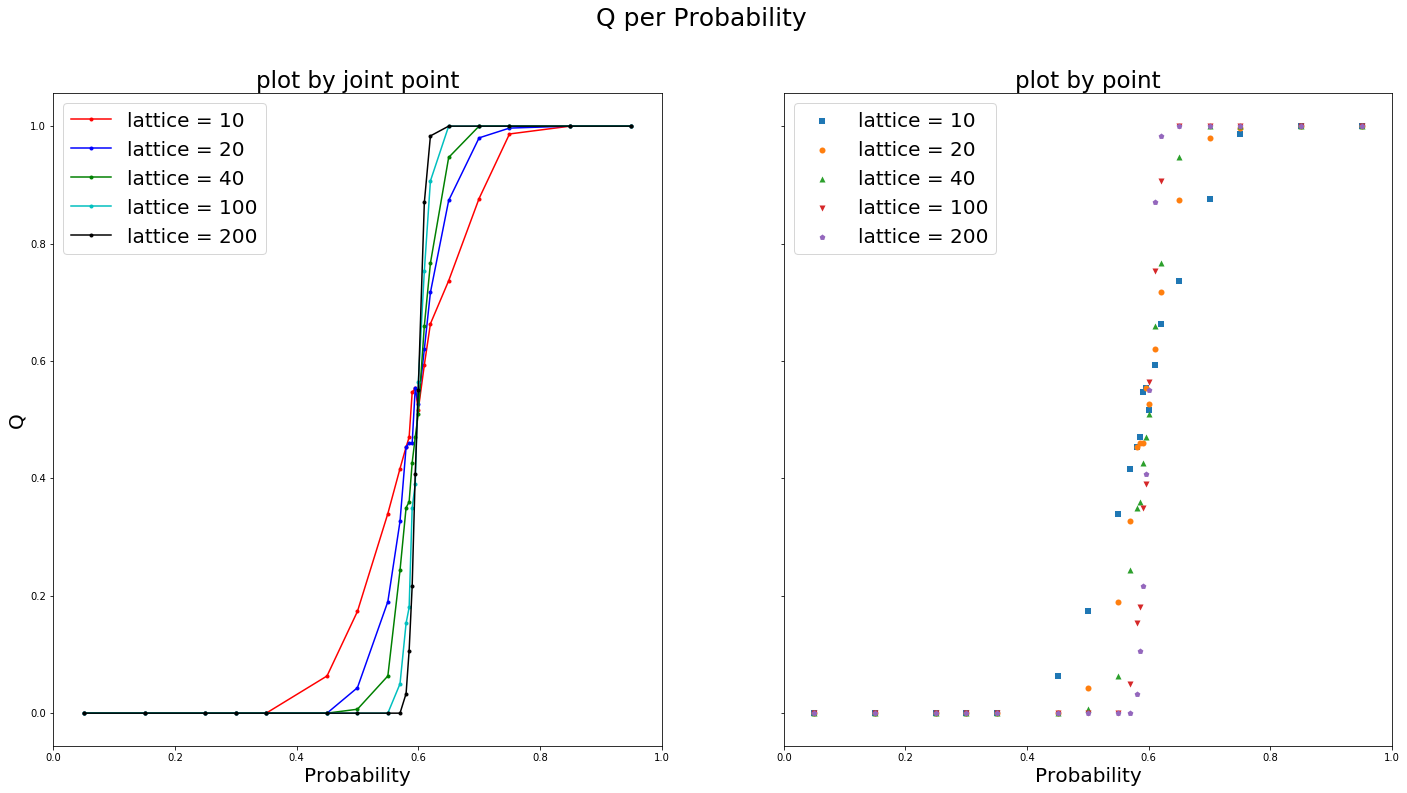

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(24,12),sharex=True,sharey=True)
fig.suptitle('Q per Probability',fontsize=25)

ax2.scatter(p_s,datas['Q10'],marker='s',linewidths=0.01,label = 'lattice = 10')
ax2.scatter(p_s,datas['Q20'],marker='o',linewidths=0.01,label = 'lattice = 20')
ax2.scatter(p_s,datas['Q40'],marker='^',linewidths=0.01,label = 'lattice = 40')
ax2.scatter(p_s,datas['Q100'],marker='v',linewidths=0.01,label = 'lattice = 100')
ax2.scatter(p_s,datas['Q200'],marker='p',linewidths=0.01,label = 'lattice = 200')

ax1.plot(p_s,datas['Q10'],'.r-',label = 'lattice = 10')
ax1.plot(p_s,datas['Q20'],'.b-',label = 'lattice = 20')
ax1.plot(p_s,datas['Q40'],'.g-',label = 'lattice = 40')
ax1.plot(p_s,datas['Q100'],'.c-',label = 'lattice = 100')
ax1.plot(p_s,datas['Q200'],'.k-',label = 'lattice = 200')

ax1.set_title('plot by joint point',fontsize = 23)
ax2.set_title('plot by point',fontsize = 23)

ax1.set_xlabel('Probability', fontsize=20)
ax2.set_xlabel('Probability', fontsize=20)

ax1.set_ylabel('Q', fontsize=20)

ax1.legend(fontsize = 20);
ax2.legend(fontsize = 20);
plt.savefig('HK fig1')

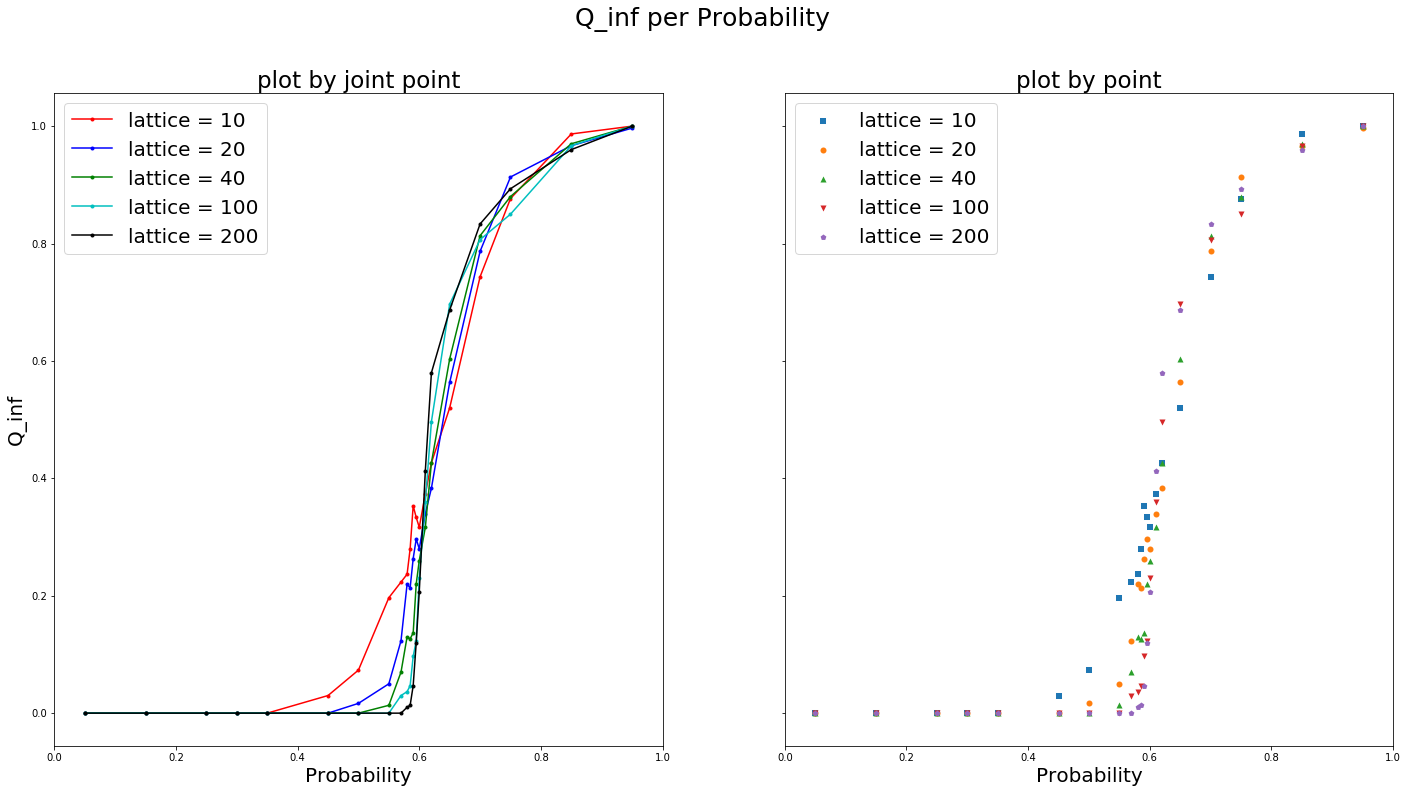

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(24,12),sharex=True,sharey=True)
fig.suptitle('Q_inf per Probability',fontsize=25)

ax2.scatter(p_s,datas['Q_inf10'],marker='s',linewidths=0.01,label = 'lattice = 10')
ax2.scatter(p_s,datas['Q_inf20'],marker='o',linewidths=0.01,label = 'lattice = 20')
ax2.scatter(p_s,datas['Q_inf40'],marker='^',linewidths=0.01,label = 'lattice = 40')
ax2.scatter(p_s,datas['Q_inf100'],marker='v',linewidths=0.01,label = 'lattice = 100')
ax2.scatter(p_s,datas['Q_inf200'],marker='p',linewidths=0.01,label = 'lattice = 200')

ax1.plot(p_s,datas['Q_inf10'],'.r-',label = 'lattice = 10')
ax1.plot(p_s,datas['Q_inf20'],'.b-',label = 'lattice = 20')
ax1.plot(p_s,datas['Q_inf40'],'.g-',label = 'lattice = 40')
ax1.plot(p_s,datas['Q_inf100'],'.c-',label = 'lattice = 100')
ax1.plot(p_s,datas['Q_inf200'],'.k-',label = 'lattice = 200')

ax1.set_title('plot by joint point',fontsize = 23)
ax2.set_title('plot by point',fontsize = 23)

ax1.set_xlabel('Probability', fontsize=20)
ax2.set_xlabel('Probability', fontsize=20)

ax1.set_ylabel('Q_inf', fontsize=20)

ax1.legend(fontsize = 20);
ax2.legend(fontsize = 20);
plt.savefig('HK fig2')

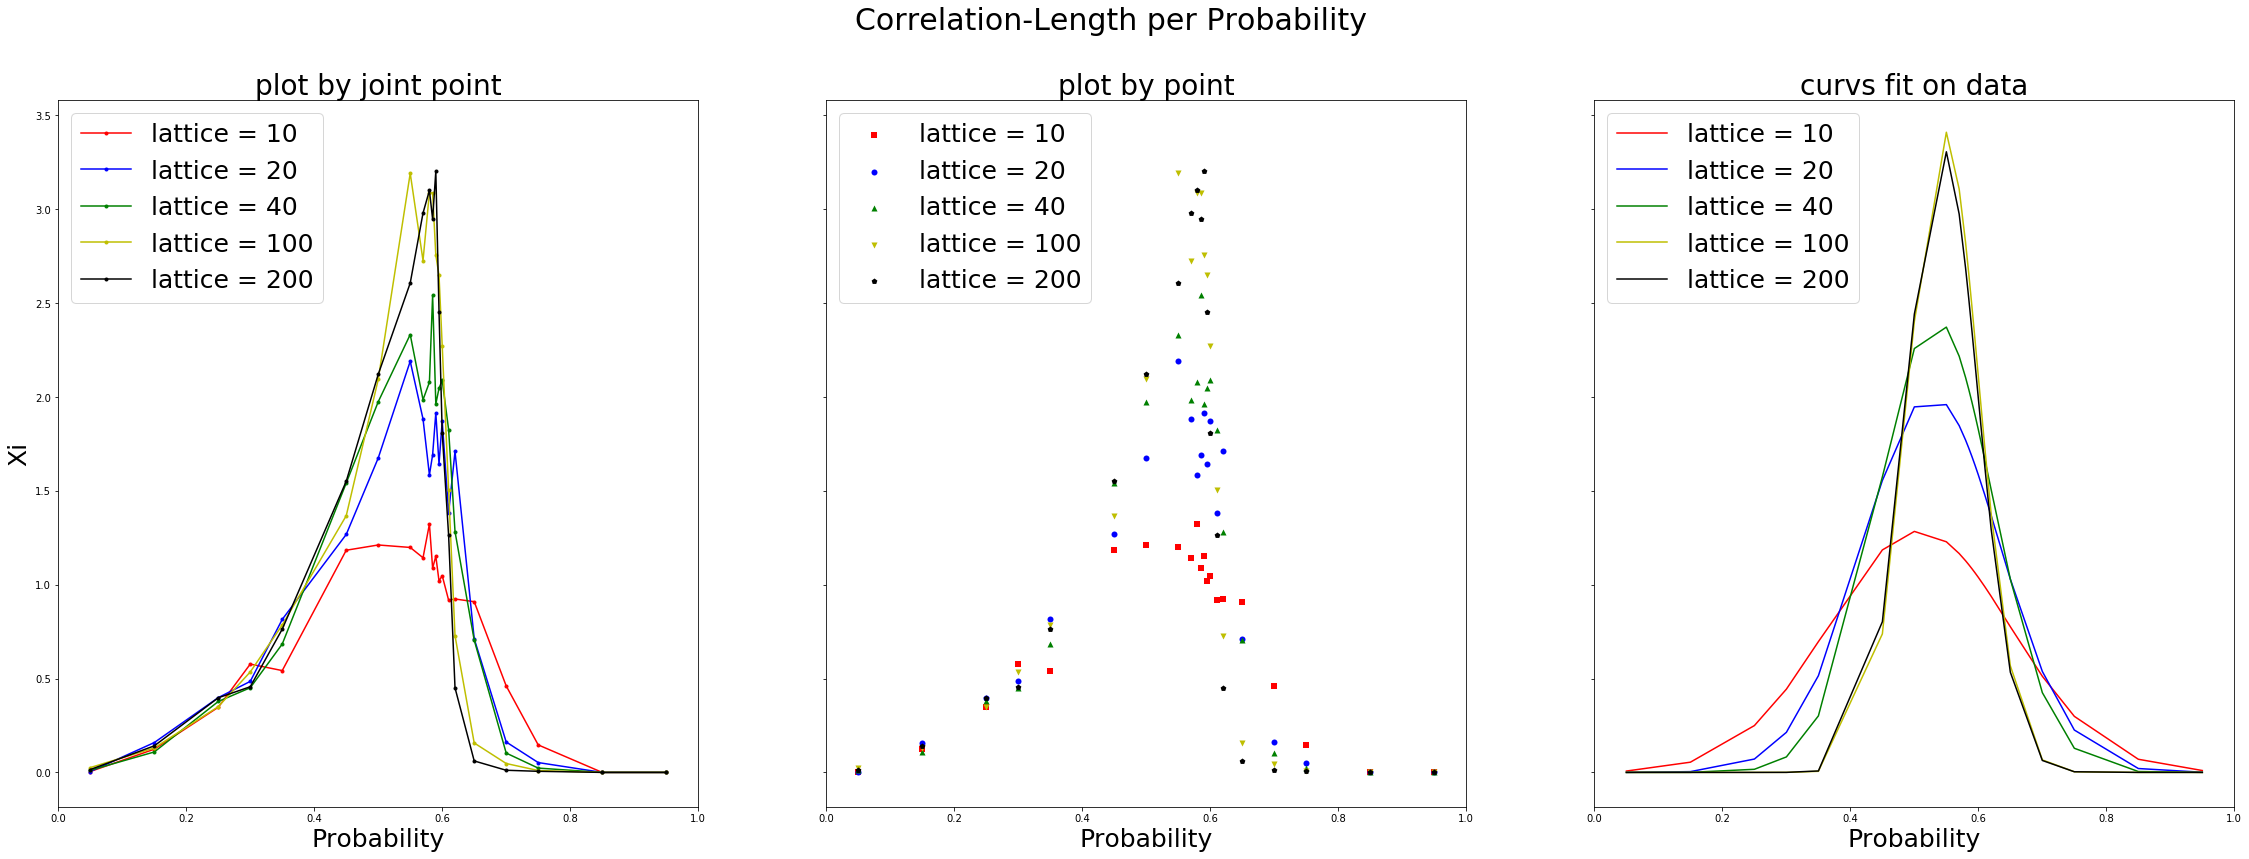

In [103]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(39,13),sharex=True,sharey=True)
fig.suptitle('Correlation-Length per Probability',fontsize=30)

ax2.scatter(p_s,datas['Xi10'],marker='s',c='r',linewidths=0.01,label = 'lattice = 10')
ax2.scatter(p_s,datas['Xi20'],marker='o',c='b',linewidths=0.01,label = 'lattice = 20')
ax2.scatter(p_s,datas['Xi40'],marker='^',c='g',linewidths=0.01,label = 'lattice = 40')
ax2.scatter(p_s,datas['Xi100'],marker='v',c='y',linewidths=0.01,label = 'lattice = 100')
ax2.scatter(p_s,datas['Xi200'],marker='p',c='k',linewidths=0.01,label = 'lattice = 200')

ax1.plot(p_s,datas['Xi10'],'.r-',label = 'lattice = 10')
ax1.plot(p_s,datas['Xi20'],'.b-',label = 'lattice = 20')
ax1.plot(p_s,datas['Xi40'],'.g-',label = 'lattice = 40')
ax1.plot(p_s,datas['Xi100'],'.y-',label = 'lattice = 100')
ax1.plot(p_s,datas['Xi200'],'.k-',label = 'lattice = 200')

from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

popt1, _ = optimize.curve_fit(gaussian, p_s, datas['Xi10'])
popt2, _ = optimize.curve_fit(gaussian, p_s, datas['Xi20'])
popt3, _ = optimize.curve_fit(gaussian, p_s, datas['Xi40'])
popt4, _ = optimize.curve_fit(gaussian, p_s, datas['Xi100'])
popt5, _ = optimize.curve_fit(gaussian, p_s, datas['Xi200'])

ax3.plot(p_s, gaussian(p_s, *popt1),'r',label = 'lattice = 10')
ax3.plot(p_s, gaussian(p_s, *popt2),'b',label = 'lattice = 20')
ax3.plot(p_s, gaussian(p_s, *popt3),'g',label = 'lattice = 40')
ax3.plot(p_s, gaussian(p_s, *popt4),'y',label = 'lattice = 100')
ax3.plot(p_s, gaussian(p_s, *popt5),'k',label = 'lattice = 200')

ax1.set_title('plot by joint point',fontsize = 28)
ax2.set_title('plot by point',fontsize = 28)
ax3.set_title('curvs fit on data',fontsize = 28)

ax1.set_xlabel('Probability', fontsize=25)
ax2.set_xlabel('Probability', fontsize=25)
ax3.set_xlabel('Probability', fontsize=25)

ax1.set_ylabel('Xi', fontsize=25)

ax1.legend(fontsize = 25);
ax2.legend(fontsize = 25);
ax3.legend(fontsize = 25);
plt.savefig('HK fig3')

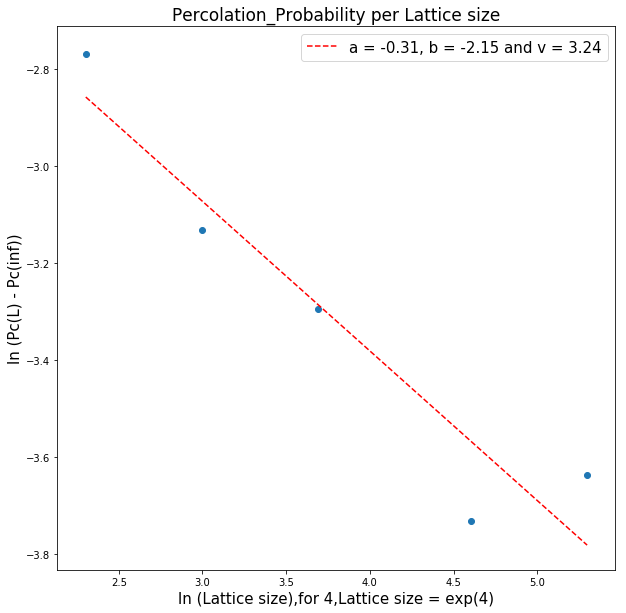

In [133]:
percolation_p = [popt1[1]- 0.57,popt2[1]- 0.57,popt3[1]- 0.57,popt4[1]- 0.57,popt5[1]- 0.57]
fig = plt.figure(figsize=(10,10))

plt.title('Percolation_Probability per Lattice size',fontsize=17)

coef = np.polyfit(np.log(L_s),np.log(np.abs(percolation_p)),1)
plt.plot(np.log(L_s),np.polyval(coef,np.log(L_s)),'r--',label='a = %.2f, b = %.2f and v = %.2f'%(coef[0],coef[1],-1/coef[0]))
plt.scatter(np.log(L_s),np.log(np.abs(percolation_p)))
plt.xlabel('ln (Lattice size),for 4,Lattice size = exp(4)',fontsize=15)
plt.ylabel('ln (Pc(L) - Pc(inf))',fontsize=15)

plt.legend(fontsize = 15)
plt.savefig('HK fig4p')

In [131]:
xi_s = ['Xi10','Xi20','Xi40','Xi100','Xi200']
L_s = [10,20,40,100,200]
percolation_p = []

for i in xi_s:
    percolation_p.append(p_s[(datas[datas[i] == max(datas[i])].index[0])] - 0.591)


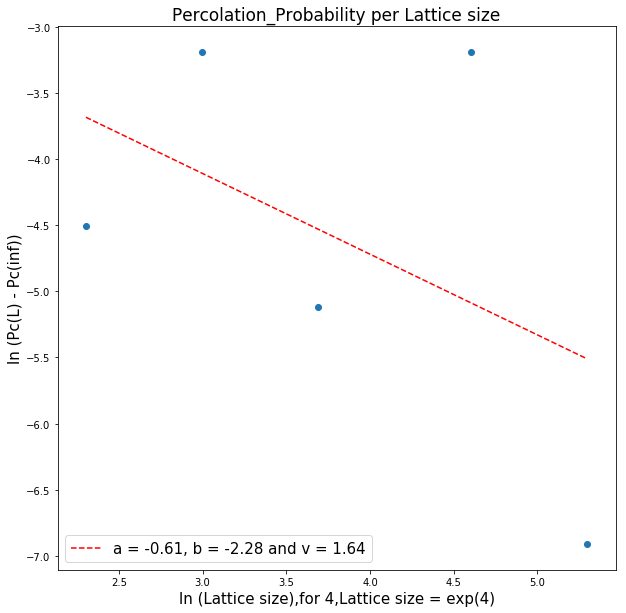

In [132]:
fig = plt.figure(figsize=(10,10))

plt.title('Percolation_Probability per Lattice size',fontsize=17)

coef = np.polyfit(np.log(L_s),np.log(np.abs(percolation_p)),1)
plt.plot(np.log(L_s),np.polyval(coef,np.log(L_s)),'r--',label='a = %.2f, b = %.2f and v = %.2f'%(coef[0],coef[1],-1/coef[0]))
plt.scatter(np.log(L_s),np.log(np.abs(percolation_p)))
plt.xlabel('ln (Lattice size),for 4,Lattice size = exp(4)',fontsize=15)
plt.ylabel('ln (Pc(L) - Pc(inf))',fontsize=15)

plt.legend(fontsize = 15)
plt.savefig('HK fig4')

#### Some try to fit curvs for Q,Q_inf and Xi

In [194]:
from scipy import optimize
def model(x,a,b,c):
    return a * np.exp(b * x) + c
p1,p2= optimize.curve_fit(model,p_s,Q)

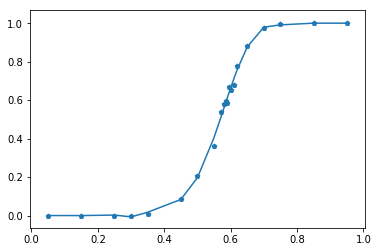

In [280]:
c1 = np.polyfit(p_s,datas['Q100'],5)

plt.plot(p_s,np.polyval(c,p_s))
plt.scatter(p_s,datas['Q100'],marker='p',linewidths=0.01)

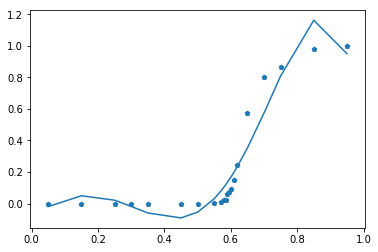

In [281]:
c2 = np.polyfit(p_s,datas['Q_inf100'],5)

plt.plot(p_s,np.polyval(c2,p_s))
plt.scatter(p_s,datas['Q_inf100'],marker='p',linewidths=0.01)

## Dr. Moghimi method

In [6]:
def percolation_check(lattice,size,label,S,Xi):
    
    for i in list(set(lattice[1:size+1,1]) & set(lattice[1:size+1,size])):
        
        if i != -1:
            a = np.sum(np.copy(S))
            S.remove(S[label[int(i)]])
            Sp = np.sum(np.square(S))
            Xi += Sp/a
            
            return  Xi
    
    a = np.sum(np.copy(S))
    if a != 0:
        Sp = np.sum(np.square(S))
        Xi += Sp/a
    
    return Xi

In [7]:
p_s = [0.05,0.15,0.25,0.30,0.35,0.45,0.50,0.55,0.57,0.58,0.585,0.59,0.595,0.60,0.61,0.62,0.65,0.70,0.75,0.85,0.95]

In [9]:

Xi = np.zeros_like(p_s)
for i,p in enumerate(p_s):
        lattice_size = 2000
        lattice = np.ones((lattice_size+2,lattice_size+2))*-1
        
        lattice, label, S = make_lattice(lattice,lattice_size,p)
        Xi[i] = percolation_check(lattice, lattice_size, label, S, Xi[i])
        

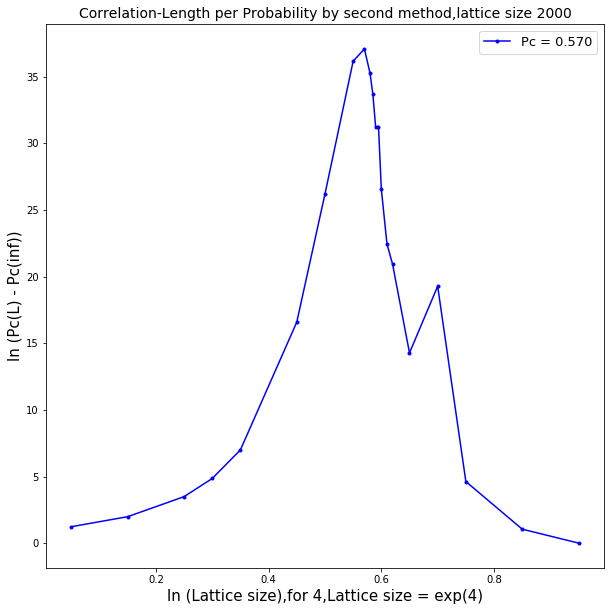

In [10]:
fig = plt.figure(figsize=(10,10))
plt.title('Correlation-Length per Probability by second method,lattice size %i'%(lattice_size),fontsize=14)
plt.plot(p_s,Xi,'.b-',label='Pc = %.3f'%(p_s[np.argmax(Xi)]))
plt.legend(fontsize = 13)
plt.xlabel('ln (Lattice size),for 4,Lattice size = exp(4)',fontsize=15)
plt.ylabel('ln (Pc(L) - Pc(inf))',fontsize=15)

plt.savefig('HK fig5')

## Simulation

In [89]:
for t in range(100):
    
    Q, Q_inf, Xi = 0, 0, 0

    lattice_size = 100
    lattice = np.ones((lattice_size+2,lattice_size+2))*-1

    lattice, label, S = make_lattice(lattice,lattice_size,0.4)

    Q, Q_inf, Xi = percolation_check(lattice, lattice_size, Q, label, Q_inf, S, Xi)
    if Q != 1 and :
        break


In [71]:
a = list(set(label[1:]))


In [79]:
b = np.arange(1,len(a)+1)
np.random.shuffle(b)
b = np.concatenate(([0], b))
b;

array([  0, 114,  39, ..., 988, 904, 977])

In [80]:
for i in range(1,len(a)):
    label[i] = b[i]

In [82]:
for i in range(1,lattice_size+1):
    for j in range(1,lattice_size+1):
        if lattice[i][j]!=-1:
            lattice[i][j]=label[int(lattice[i][j])]

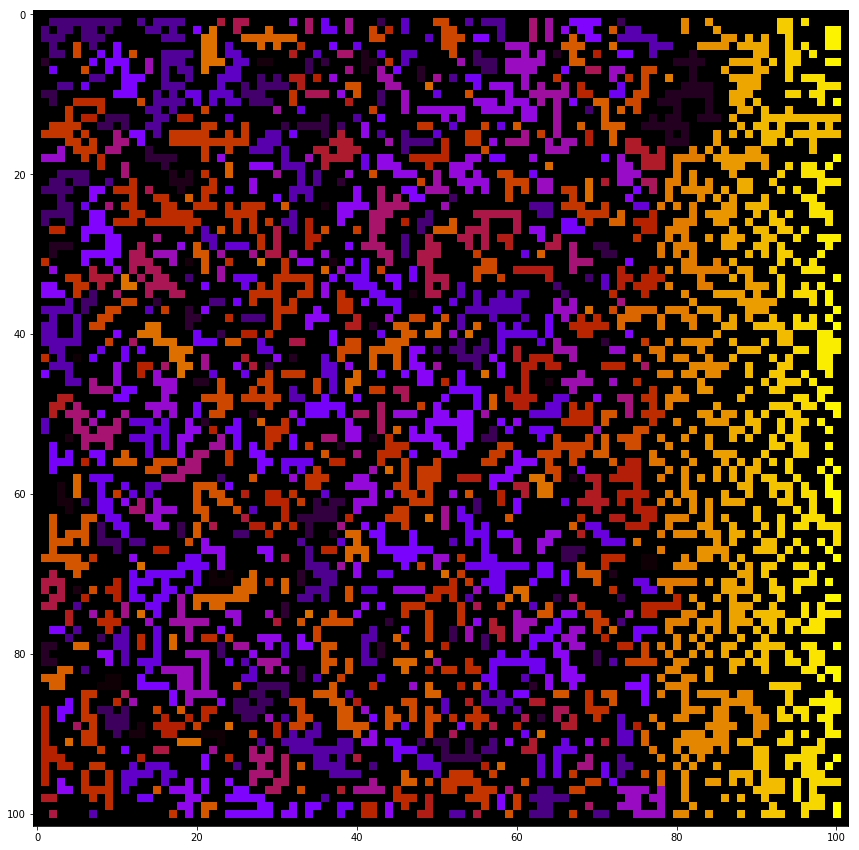

In [85]:
fig = plt.figure(figsize=(15,15))
plt.imshow(lattice,cmap=plt.cm.gnuplot)